In [143]:
# Importing all the libraries and the csv for analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
d1 = pd.read_csv('loan.csv',low_memory=False)

In [5]:
# head for verification
d1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [31]:
print(d1.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

The list of selected columns from the given ones which seems important for this analysis:

1. **loan_status**: This is the target variable, indicating whether the loan was fully paid or charged off (defaulted). It's essential for understanding loan outcomes.

2. **annual_inc**: The borrower's self-reported annual income provides insights into their ability to make loan payments and manage their finances.

3. **dti**: The debt-to-income ratio helps assess the borrower's financial health by comparing their monthly debt payments to their income.

4. **emp_length**: Employment length is crucial for evaluating the borrower's stability and income source, which impacts their repayment capability.

5. **int_rate**: The interest rate on the loan affects the borrower's monthly payment and overall affordability.

6. **purpose**: The purpose of the loan can provide insights into the borrower's financial goals and intentions.

7. **term**: The loan term affects the monthly payment and can influence the borrower's ability to repay.

8. **open_acc** and **total_acc**: These two variables give an overview of the borrower's credit history and current credit lines.

9. **revol_util**: The revolving line utilization rate reflects the borrower's credit utilization, impacting their credit score and risk.

10. **pub_rec** and **pub_rec_bankruptcies**: These variables indicate derogatory public records and bankruptcies, highlighting potential credit risk.

11. **addr_state** and **zip_code**: Location might influence economic conditions and repayment capability.

12. **avg_cur_bal**: The average current balance of all accounts can provide insights into the borrower's financial stability.

13. **delinq_2yrs**: The number of past-due incidences of delinquency over the past 2 years reflects credit behavior history.


In [53]:
selected_columns = [
    'id','loan_status', 'annual_inc', 'dti', 'emp_length', 
    'int_rate', 'purpose', 'term', 'open_acc', 'total_acc', 
    'revol_util', 'pub_rec', 'pub_rec_bankruptcies', 'addr_state', 
    'zip_code', 'avg_cur_bal', 'delinq_2yrs','loan_amnt'
]

d2 = d1[selected_columns].copy()

***Univariate Exploration***

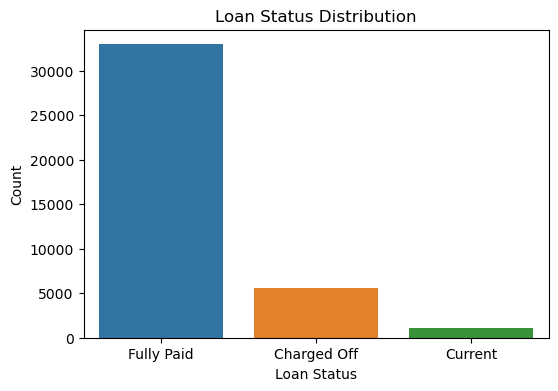

In [27]:
# Explore loan status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=d2)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

This initial visualization provides you with a quick overview of the proportion of loan statuses in the dataset. We can further investigate how other variables influence these statuses through bivariate analysis, correlation analysis, and more visualizations.

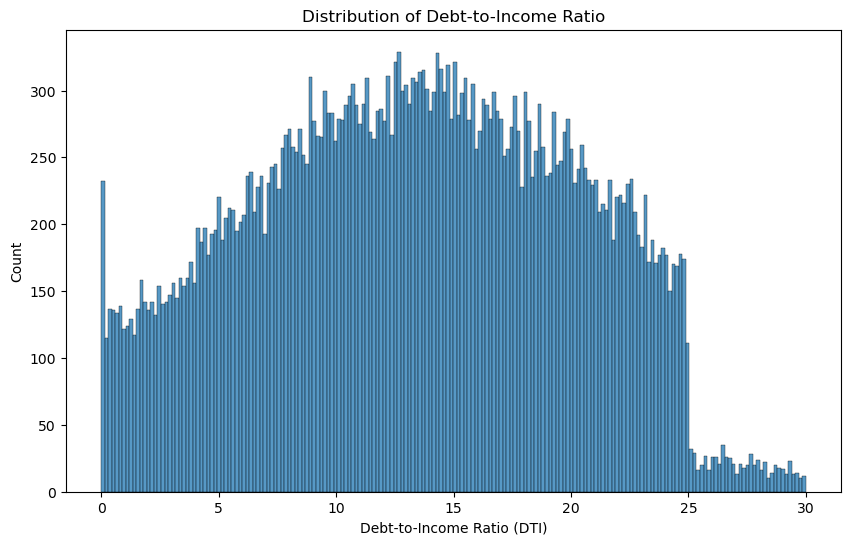

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=d2, x='dti', bins=200)
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Count')
plt.title('Distribution of Debt-to-Income Ratio')
plt.show()

The Debt-to-Income Ratio (DTI) represents the ratio of a borrower's monthly debt payments to their monthly income.
The histogram shows how many loans fall into different ranges of DTI values.
You can observe whether there are any specific ranges of DTI that have higher or lower loan counts, which could indicate how this variable might influence loan default.

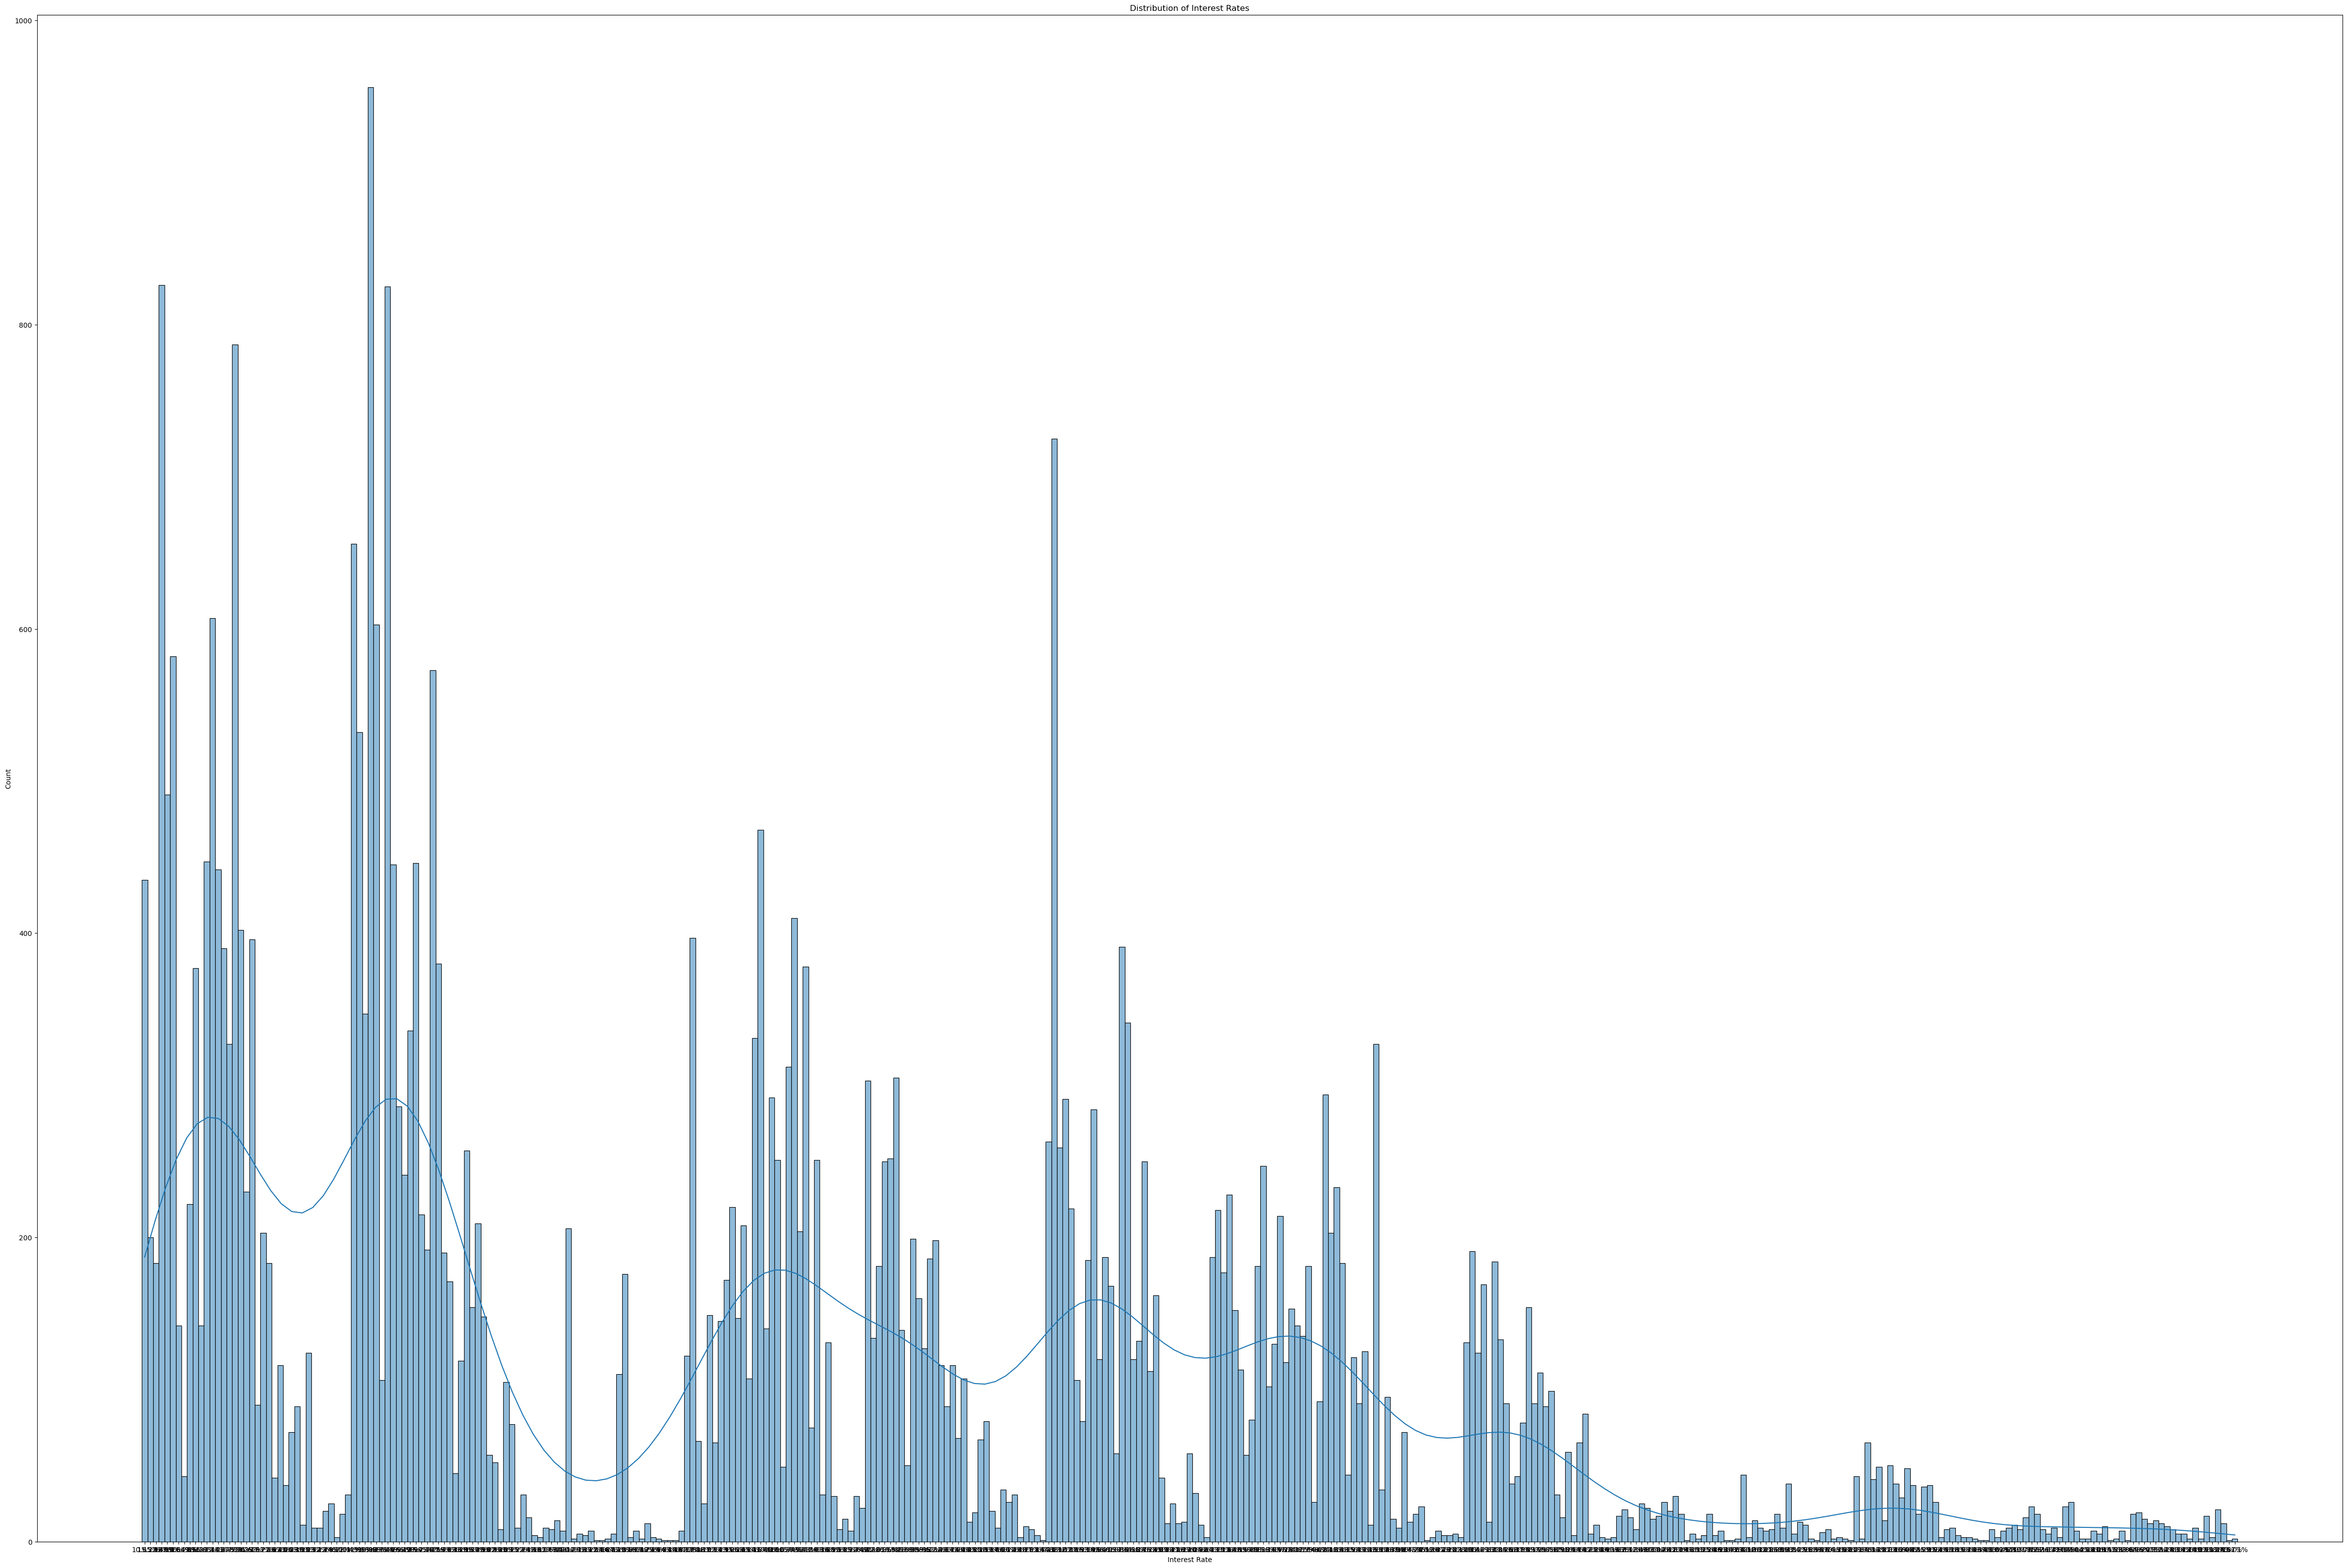

In [41]:
plt.figure(figsize=(60, 40))
sns.histplot(data=d2, x='int_rate', bins=10, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rates')
plt.show()

Interest rate is the percentage charged on the loan amount as interest.
The histogram displays the frequency of loans with different interest rate ranges.
This analysis helps you understand the spread of interest rates and whether higher interest rates are associated with different loan statuses.

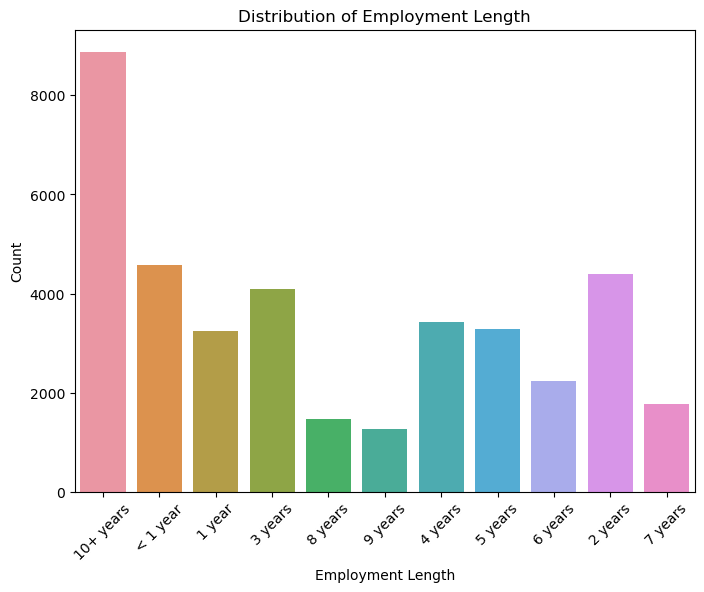

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=d2, x='emp_length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')
plt.xticks(rotation=45)
plt.show()

This analysis provides the count of loans based on the length of employment of the borrowers.
You can identify the distribution of borrowers across different employment lengths, such as '1 year', '2 years', '3 years', and so on.
This variable could potentially provide insights into whether borrowers with longer employment lengths are less likely to default.

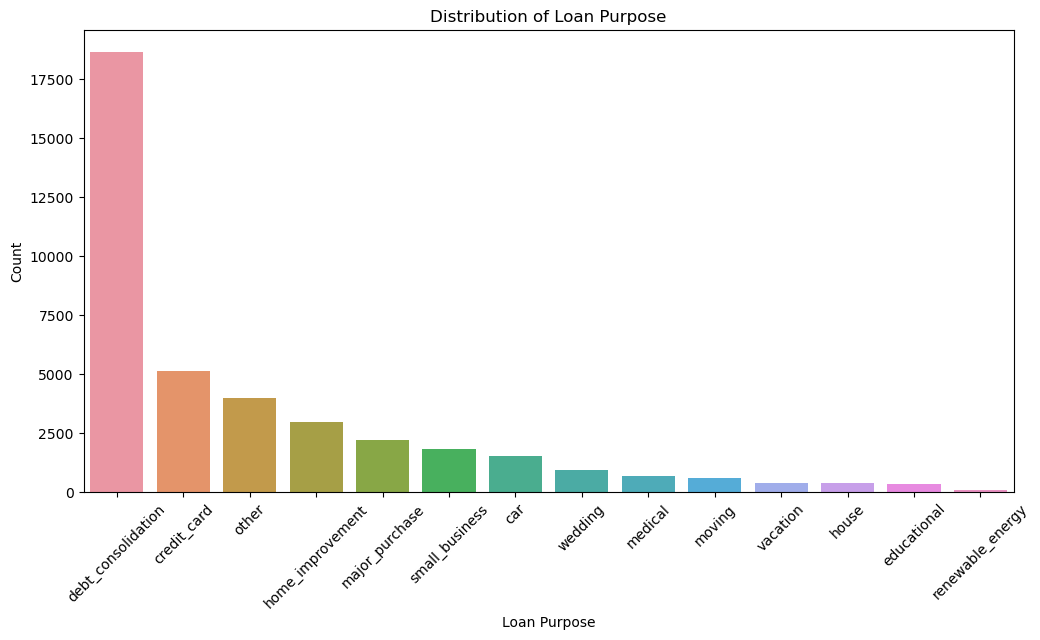

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(data=d2, x='purpose', order=d2['purpose'].value_counts().index)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Distribution of Loan Purpose')
plt.xticks(rotation=45)
plt.show()

This analysis shows the count of loans based on their stated purpose.
The x-axis lists various loan purposes, such as 'debt_consolidation', 'credit_card', 'home_improvement', etc.
By examining the distribution, you can understand the most common reasons borrowers are seeking loans, and whether certain purposes have different default rates.

***Bivariate exploration***


In [49]:
intrt = d2.copy()

Creating a new copy of the dataset for ploting intrest rate and loan status relation

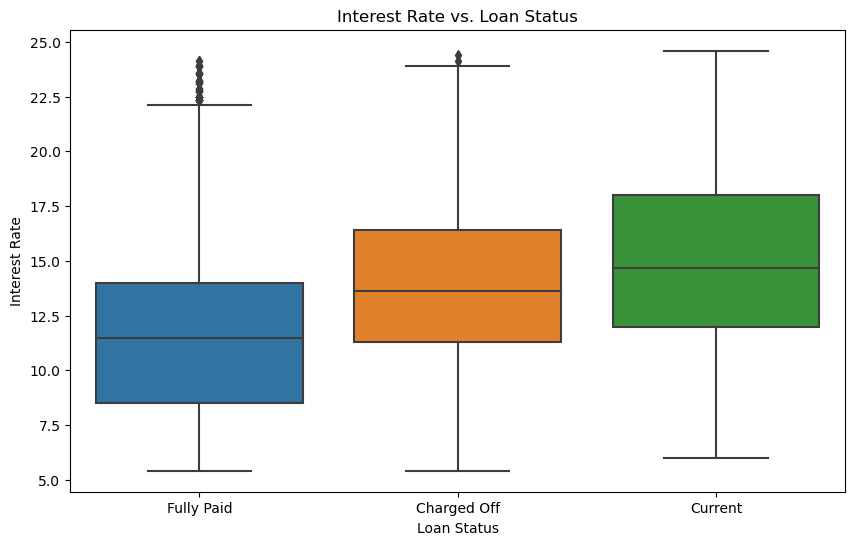

In [50]:
# Convert 'int_rate' column to numeric
intrt['int_rate'] = pd.to_numeric(intrt['int_rate'].str.replace('%', ''), errors='coerce')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=intrt, x='loan_status', y='int_rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. Loan Status')
plt.show()

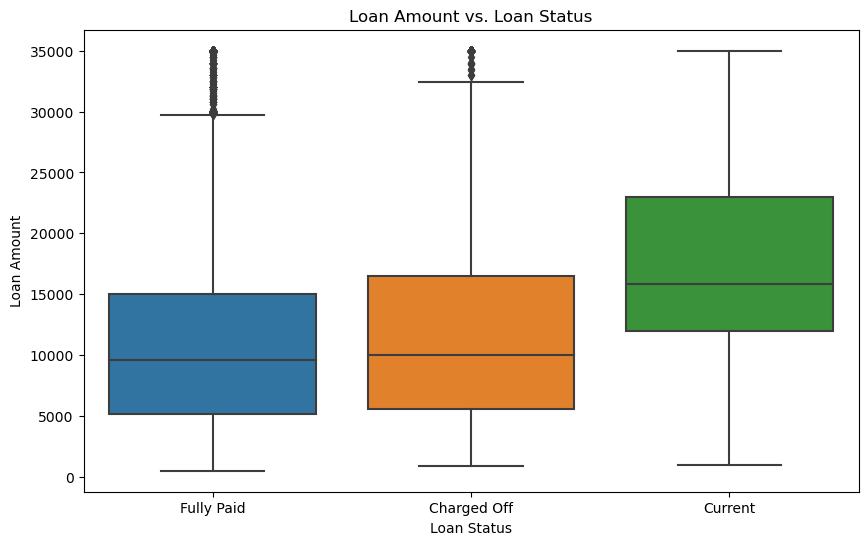

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=d2, x='loan_status', y='loan_amnt')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Loan Status')
plt.show()

This box plot compares the distribution of loan amounts for fully paid loans and defaulted loans. It helps us identify any differences in loan amounts between the two groups.

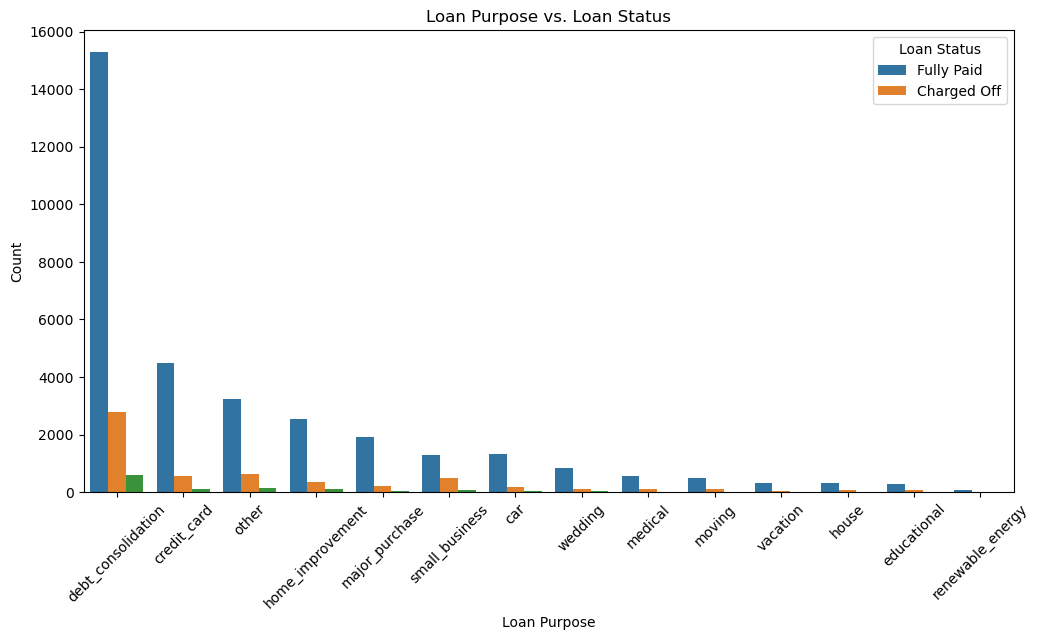

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=d2, x='purpose', hue='loan_status', order=d2['purpose'].value_counts().index)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Purpose vs. Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])
plt.show()

This count plot shows the distribution of loan purposes based on loan status. It helps us understand how different loan purposes relate to loan default, whether certain purposes have higher default rates, and how they compare to fully paid loans.

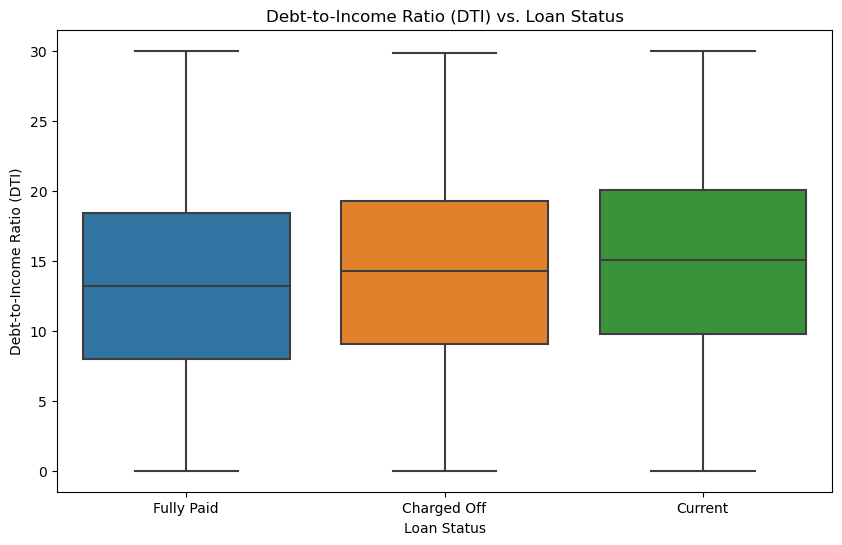

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=d2, x='loan_status', y='dti')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.title('Debt-to-Income Ratio (DTI) vs. Loan Status')
plt.show()

This box plot compares the distribution of debt-to-income ratios (DTI) for fully paid loans and defaulted loans. It helps us understand if borrowers with higher DTI ratios are more likely to default.

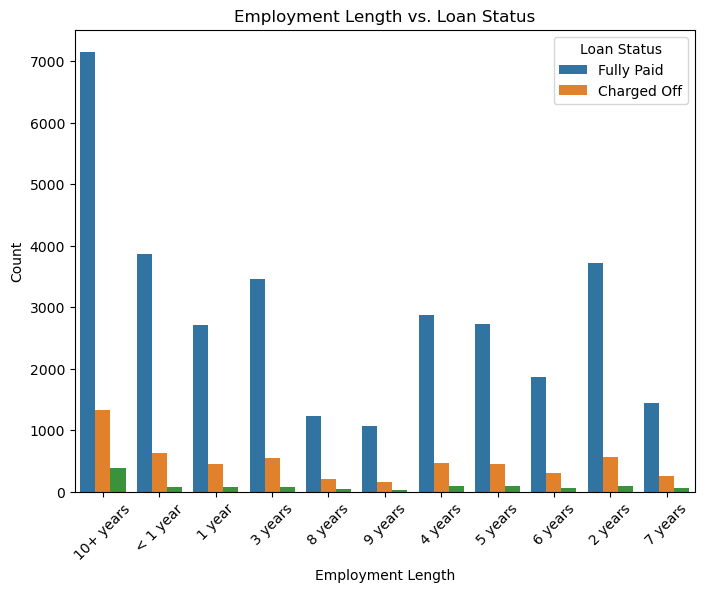

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(data=d1, x='emp_length', hue='loan_status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Employment Length vs. Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])
plt.show()

This count plot shows the distribution of loan statuses based on different employment lengths. It helps us understand how the length of employment relates to loan default.

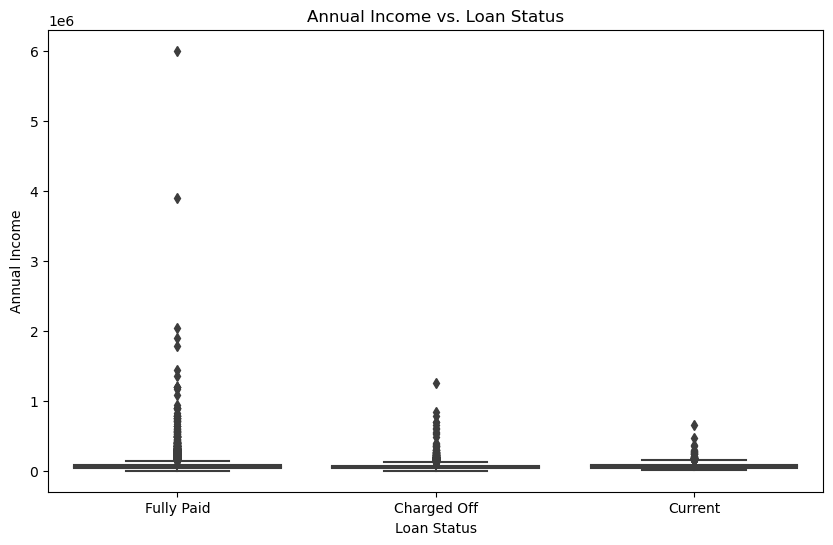

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=d1, x='loan_status', y='annual_inc')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Annual Income vs. Loan Status')
plt.show()

This box plot compares the distribution of annual incomes for fully paid loans and defaulted loans. It helps us understand if borrowers' annual income influences the likelihood of loan default.

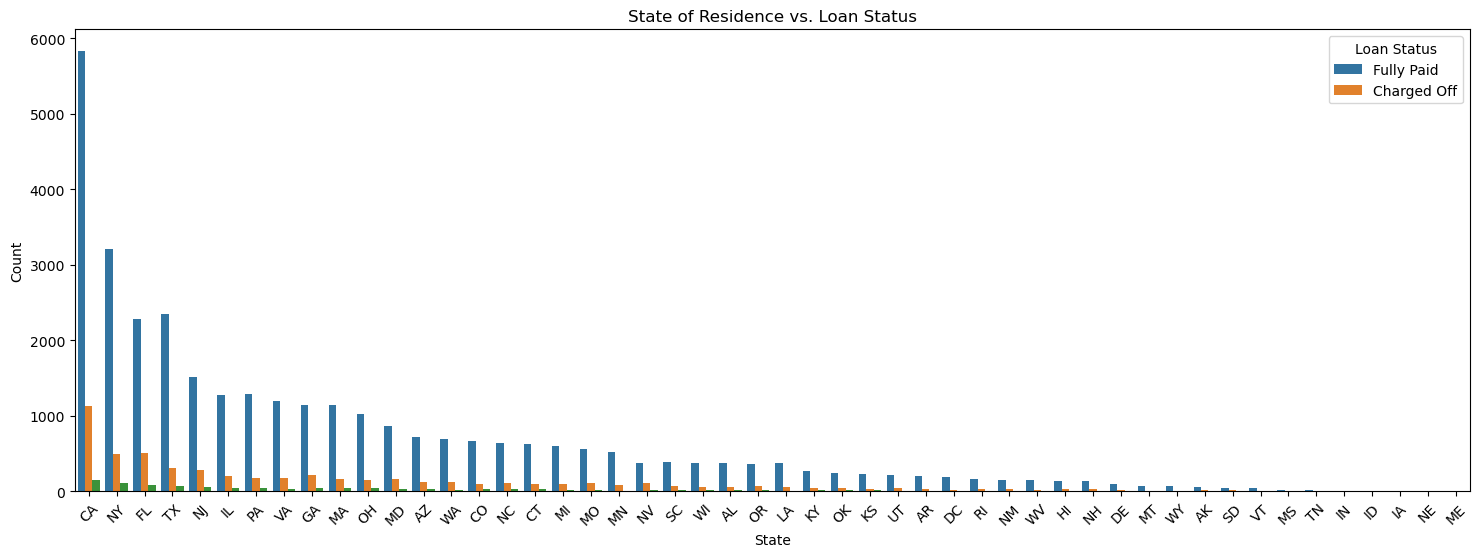

In [68]:
plt.figure(figsize=(18, 6))
sns.countplot(data=d2, x='addr_state', hue='loan_status', order=d2['addr_state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State of Residence vs. Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])
plt.show()

This count plot shows the distribution of loan statuses based on the state of residence. It helps us understand if loan default rates vary by state.

In [ ]:
# d3 = d2.copy()
# d3 for derived variables creation 

In [70]:

d3['int_rate'] = pd.to_numeric(d3['int_rate'].str.replace('%', ''), errors='coerce')

# Define interest rate ranges and labels
interest_rate_ranges = [(0, 10), (10, 15), (15, 20), (20, 100)]
interest_rate_labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column 'int_rate_range' with the interest rate ranges
d3['int_rate_range'] = pd.cut(d3['int_rate'], bins=[r[0] for r in interest_rate_ranges] + [100],
                                         labels=interest_rate_labels, right=False)

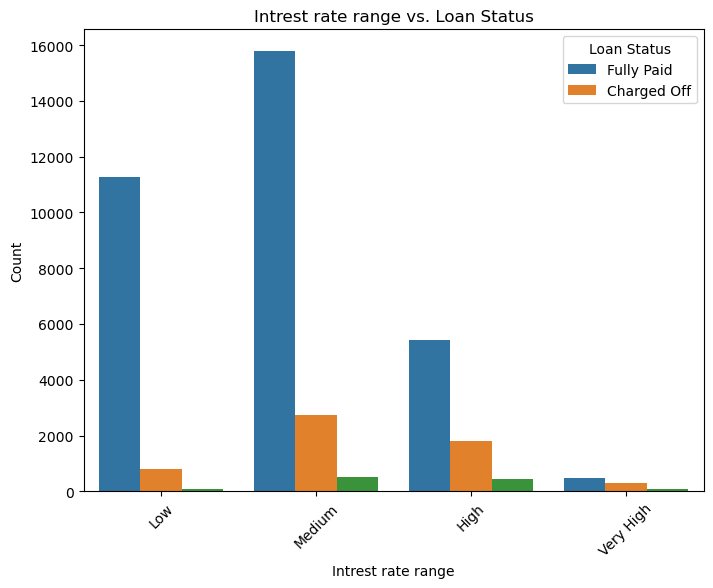

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(data=d3, x='int_rate_range', hue='loan_status')
plt.xlabel('Intrest rate range')
plt.ylabel('Count')
plt.title('Intrest rate range vs. Loan Status')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])
plt.show()

Creating categorical bins for interest rates, such as 'low', 'medium', 'high', and 'very high'.
This can provide a more understanding of how different interest rate ranges impact loan default.

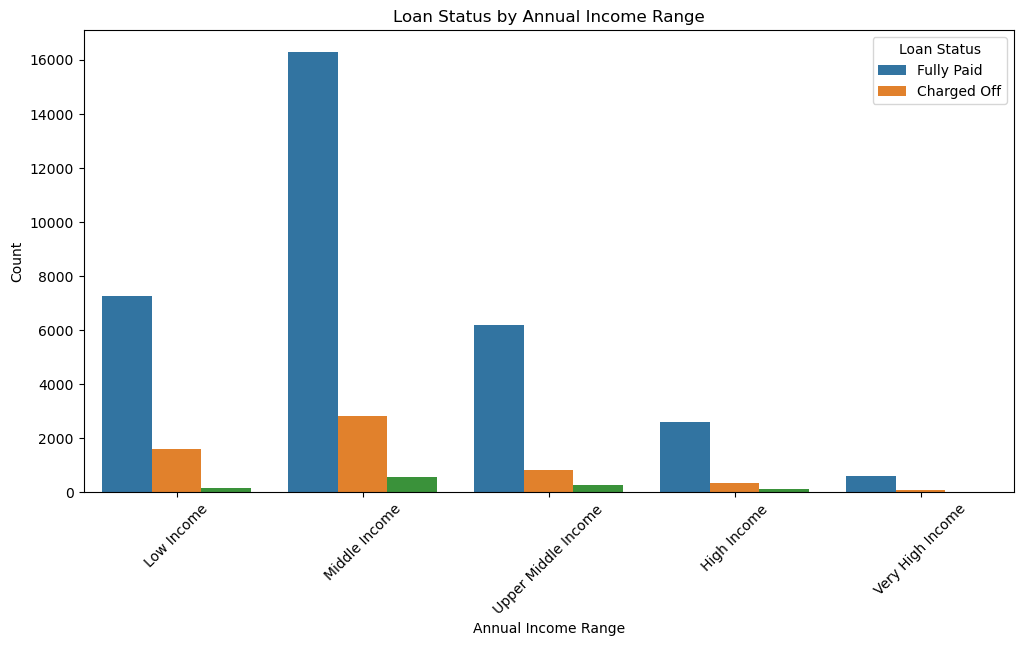

In [75]:

income_ranges = [(0, 40000), (40000, 80000), (80000, 120000), (120000, 200000), (200000, 10000000)]
income_labels = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income', 'Very High Income']
d3['income_range'] = pd.cut(d3['annual_inc'], bins=[r[0] for r in income_ranges] + [10000000],
                                       labels=income_labels, right=False)
plt.figure(figsize=(12, 6))
sns.countplot(data=d3, x='income_range', hue='loan_status', order=income_labels)
plt.xlabel('Annual Income Range')
plt.ylabel('Count')
plt.title('Loan Status by Annual Income Range')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])
plt.show()

Creating income brackets, such as 'low income', 'middle income', and 'high income'.
This can show whether borrowers in certain income ranges are more likely to default.

***Corelation matrix***

In [79]:
# d4 = d2.drop(columns=['avg_cur_bal'])
#removing the avg_cur_bal column cause its creating issues in the corelation

Index(['id', 'loan_status', 'annual_inc', 'dti', 'emp_length', 'int_rate',
       'purpose', 'term', 'open_acc', 'total_acc', 'revol_util', 'pub_rec',
       'pub_rec_bankruptcies', 'addr_state', 'zip_code', 'delinq_2yrs',
       'loan_amnt'],
      dtype='object')

/var/folders/8j/l5qhmn695n3cctcl4h0dzkqr0000gp/T/ipykernel_81762/2316707516.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = d4.corr()


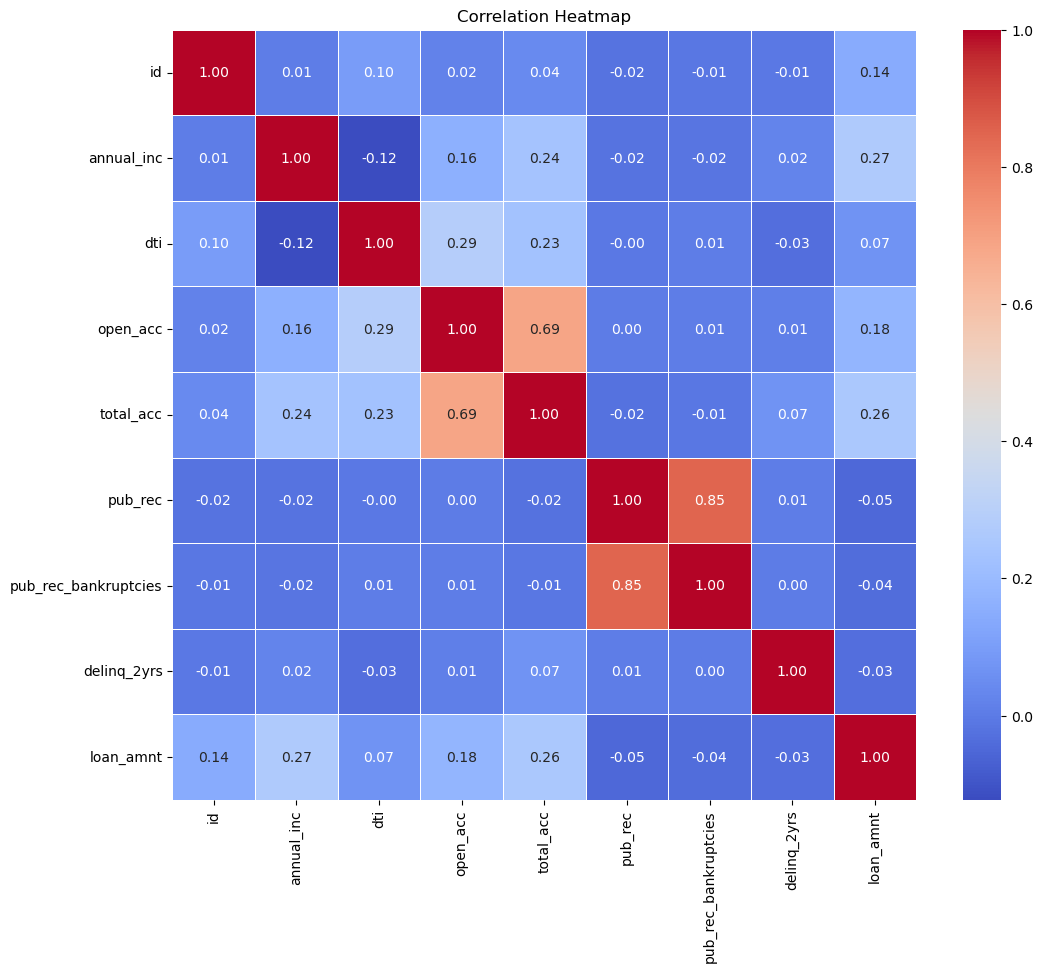

In [78]:
correlation_matrix = d4.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

unable to find much relations here which are usefull

In [126]:
d2.columns

Index(['id', 'loan_status', 'annual_inc', 'dti', 'emp_length', 'int_rate',
       'purpose', 'term', 'open_acc', 'total_acc', 'revol_util', 'pub_rec',
       'pub_rec_bankruptcies', 'addr_state', 'zip_code', 'avg_cur_bal',
       'delinq_2yrs', 'loan_amnt'],
      dtype='object')

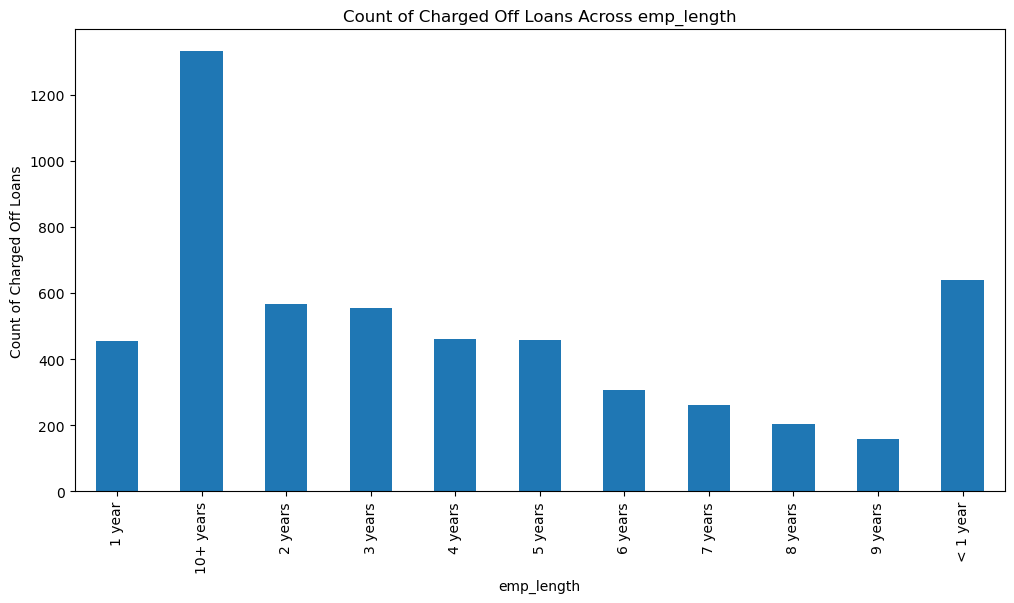

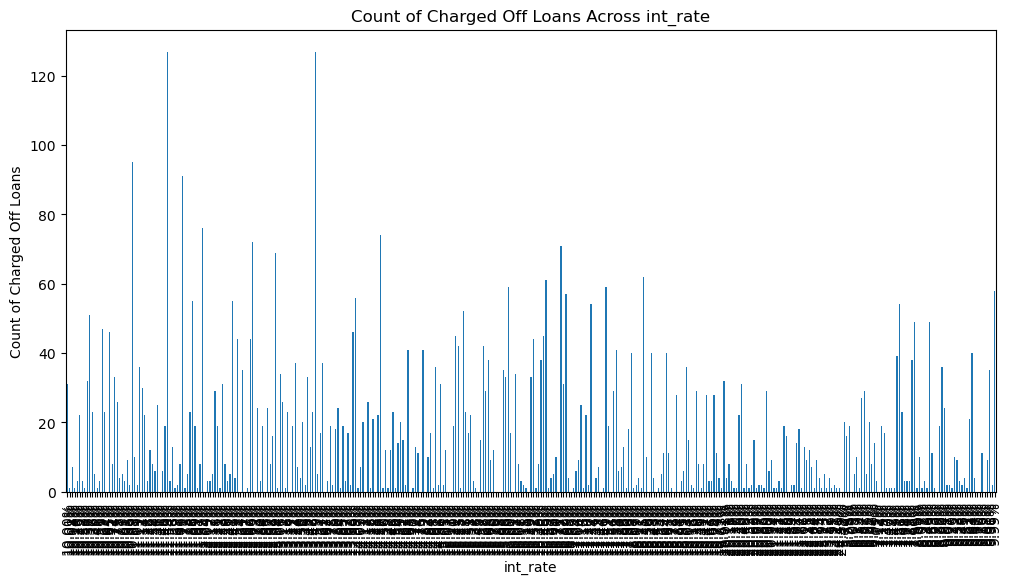

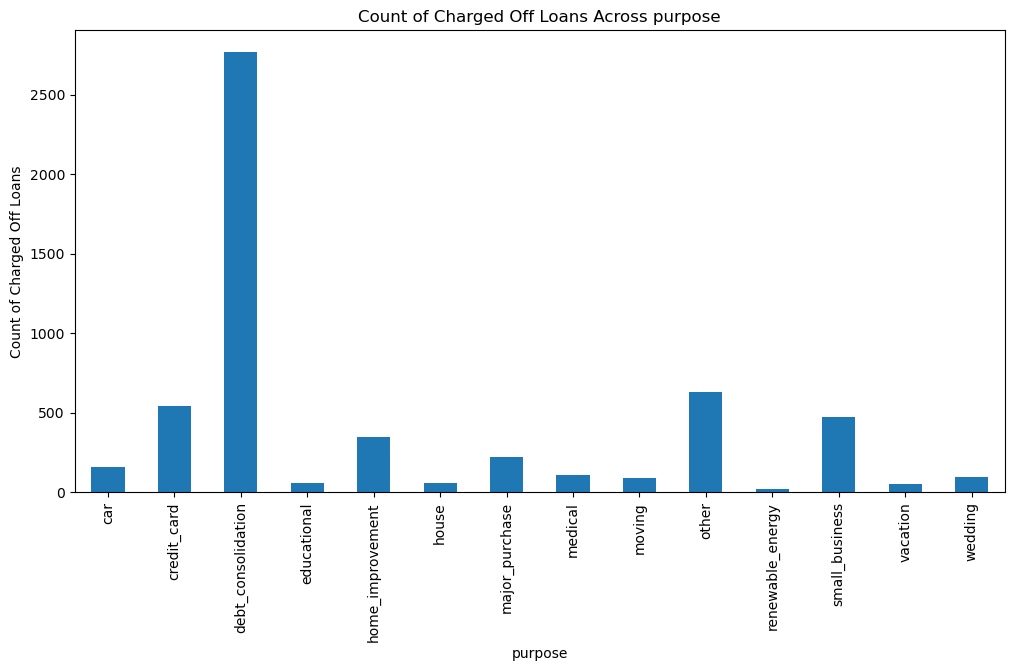

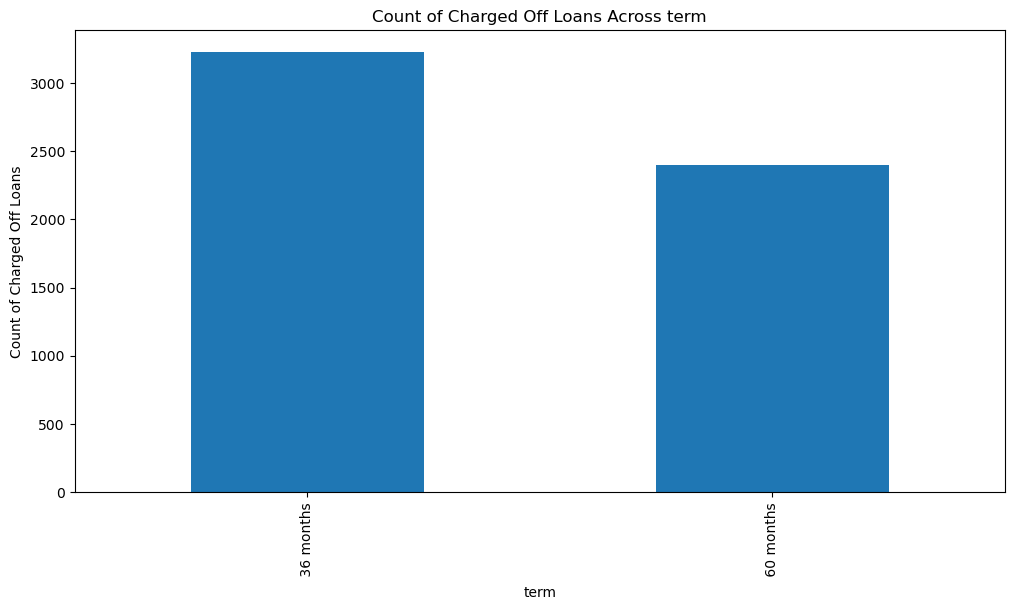

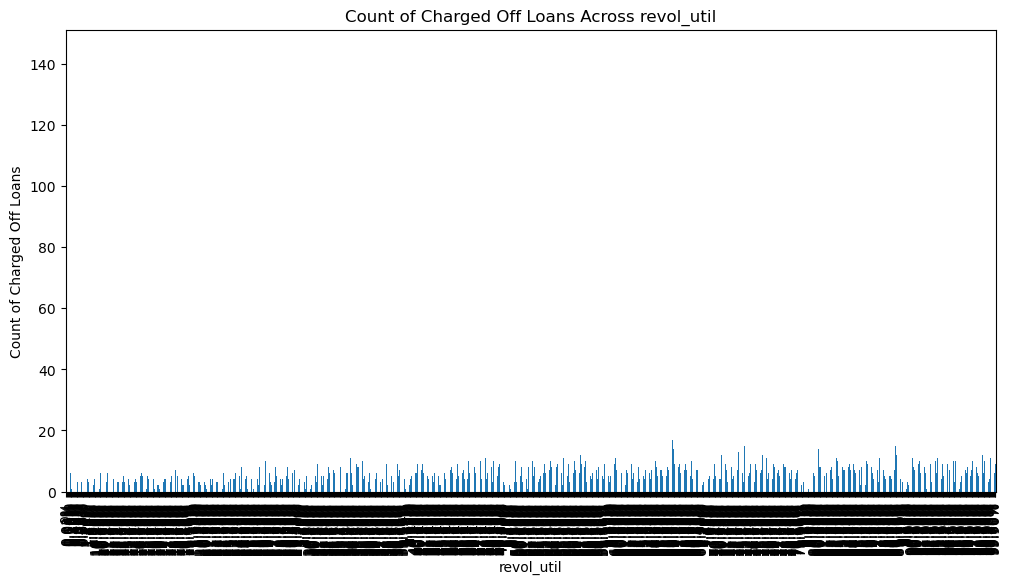

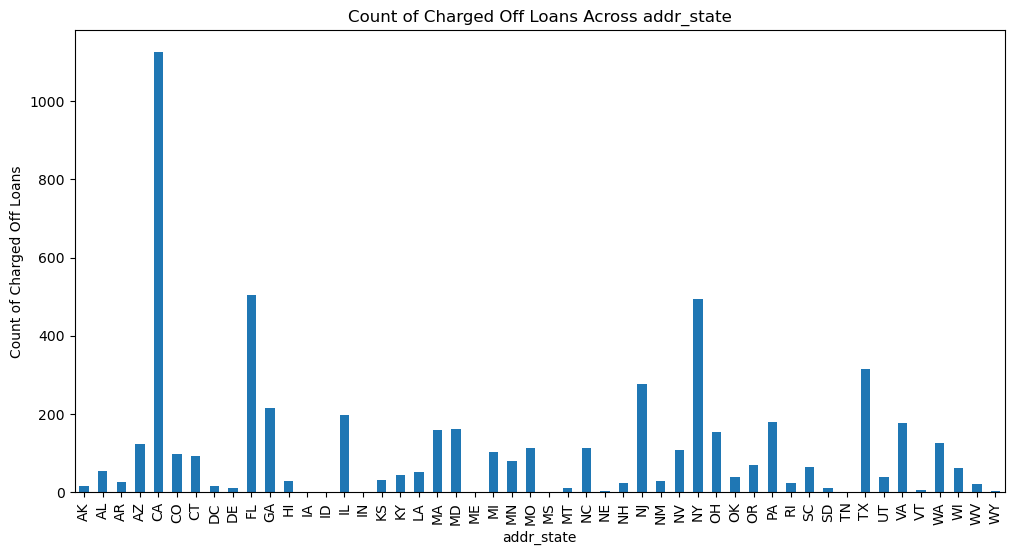

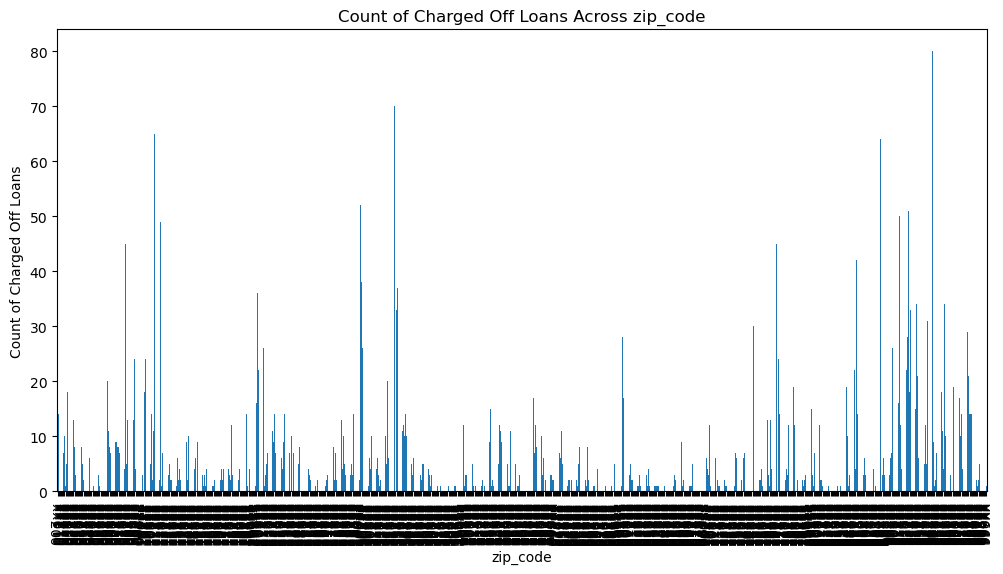

In [129]:
categorical_columns = d2.select_dtypes(include='object').columns
strong_categorical = []
for column in categorical_columns:
    if column != 'loan_status':
        cross_tab = pd.crosstab(d2[column], d2['loan_status'])
        charged_off_counts = cross_tab['Charged Off']
        charged_off_counts.plot(kind='bar', figsize=(12, 6))
        plt.xticks(rotation=90)
        plt.title(f'Count of Charged Off Loans Across {column}')
        plt.xlabel(column)
        plt.ylabel('Count of Charged Off Loans')
        plt.show()

In [140]:
categorical_columns = d2.select_dtypes(include='number').columns
categorical_columns

Index(['id', 'annual_inc', 'dti', 'open_acc', 'total_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'avg_cur_bal', 'delinq_2yrs', 'loan_amnt'],
      dtype='object')

***validating thedefaulters accross diferent numerical variables.***

***Annual Income***

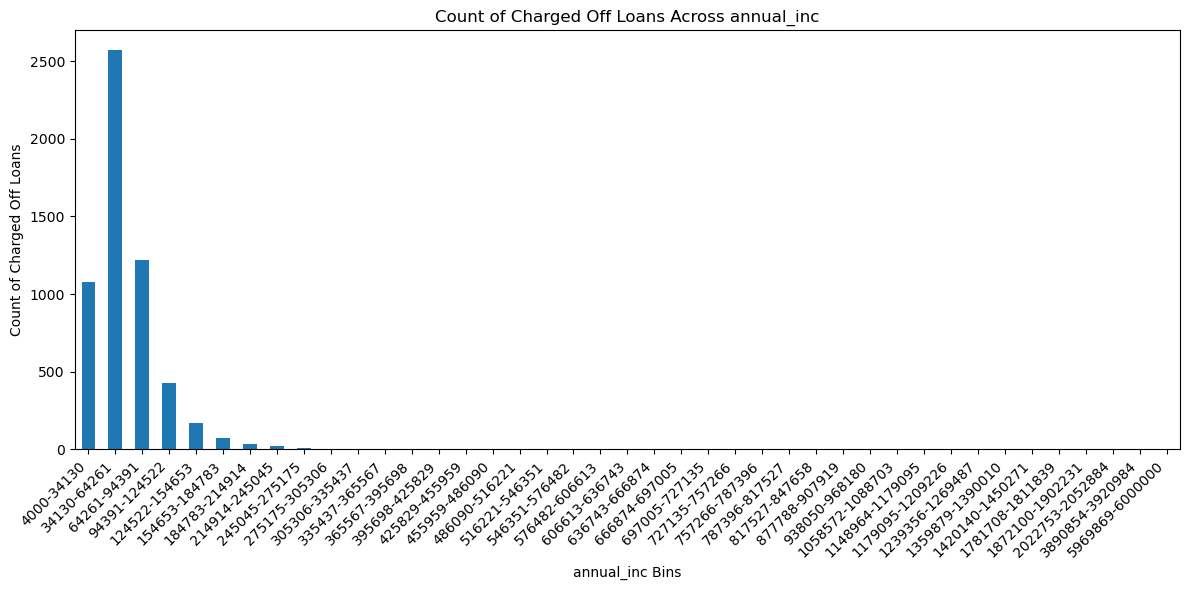

In [146]:
column='annual_inc'



# Define bin edges
bin_edges = np.linspace(d2[column].min(), d2[column].max(), num=200)

# Create bins and labels
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges) - 1)]

# Assign each value to a bin
d2['income_bin'] = pd.cut(d2[column], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Create cross-tabulation
cross_tab = pd.crosstab(d2['income_bin'], d2['loan_status'])
charged_off_counts = cross_tab['Charged Off']

# Plot the bar chart
charged_off_counts.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.title(f'Count of Charged Off Loans Across {column}')
plt.xlabel(f'{column} Bins')
plt.ylabel('Count of Charged Off Loans')
plt.tight_layout()
plt.show()

***DTI***

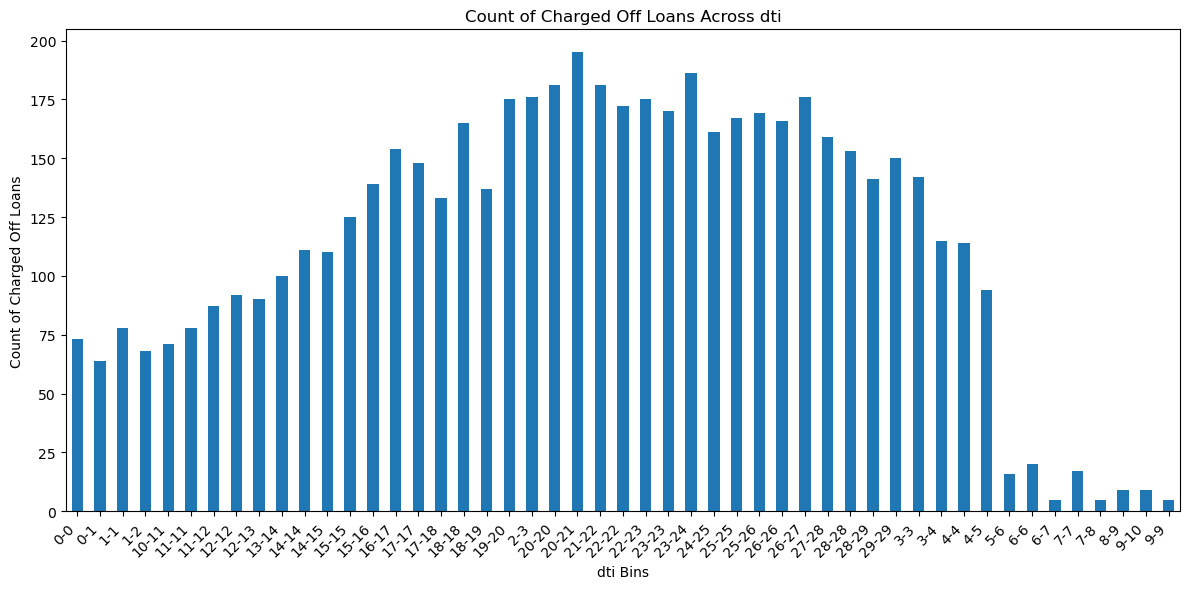

In [152]:
column='dti'

# Define bin edges
bin_edges = np.linspace(d2[column].min(), d2[column].max(), num=50) 

# Create bins and labels
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges) - 1)]
unique_bin_labels = np.unique(bin_labels)  # Get unique labels

# Assign each value to a bin
d2[f'{column}_bins'] = pd.cut(d2[column], bins=bin_edges, labels=unique_bin_labels, include_lowest=True)

# Create cross-tabulation
cross_tab = pd.crosstab(d2[f'{column}_bins'], d2['loan_status'])
charged_off_counts = cross_tab['Charged Off']

# Plot the bar chart
charged_off_counts.plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.title(f'Count of Charged Off Loans Across {column}')
plt.xlabel(f'{column} Bins')
plt.ylabel('Count of Charged Off Loans')
plt.tight_layout()
plt.show()

***Bankruptcy***

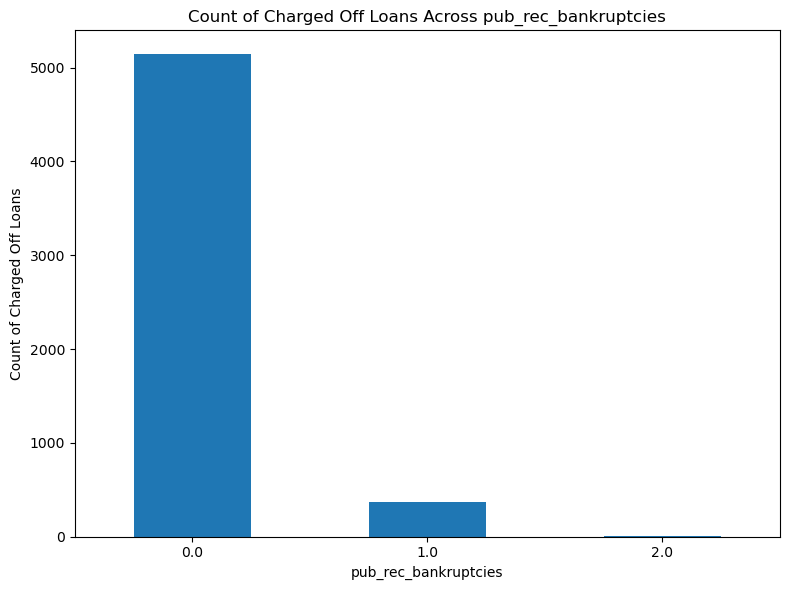

In [163]:
column='pub_rec_bankruptcies'

cross_tab = pd.crosstab(d2[column], d2['loan_status'])
charged_off_counts = cross_tab['Charged Off']

# Plot the bar chart
charged_off_counts.plot(kind='bar', figsize=(8, 6))
plt.title(f'Count of Charged Off Loans Across {column}')
plt.xlabel(column)
plt.ylabel('Count of Charged Off Loans')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [164]:
d2.delinq_2yrs.value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

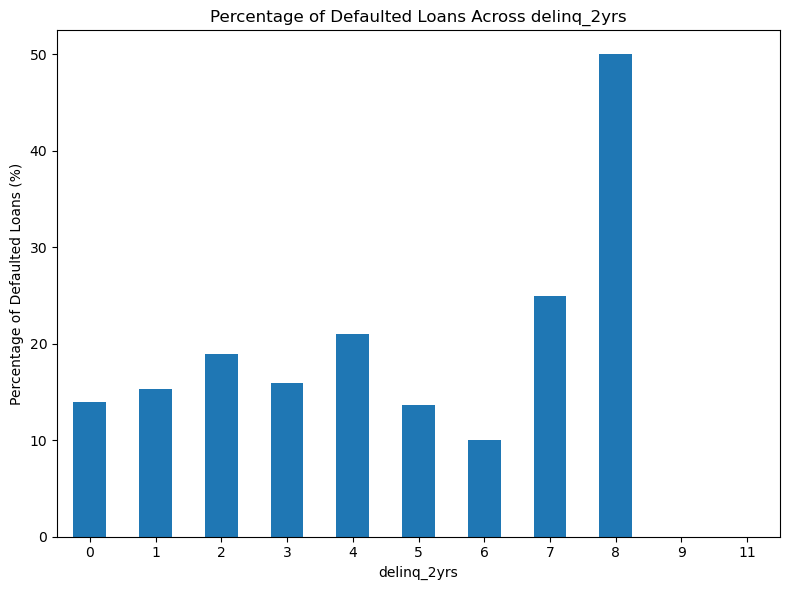

In [169]:
column = 'delinq_2yrs'

# Create cross-tabulation
cross_tab = pd.crosstab(d2[column], d2['loan_status'])
percentage_defaulted = (cross_tab['Charged Off'] / cross_tab.sum(axis=1)) * 100

# Plot the bar chart
percentage_defaulted.plot(kind='bar', figsize=(8, 6))
plt.title(f'Percentage of Defaulted Loans Across {column}')
plt.xlabel(column)
plt.ylabel('Percentage of Defaulted Loans (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

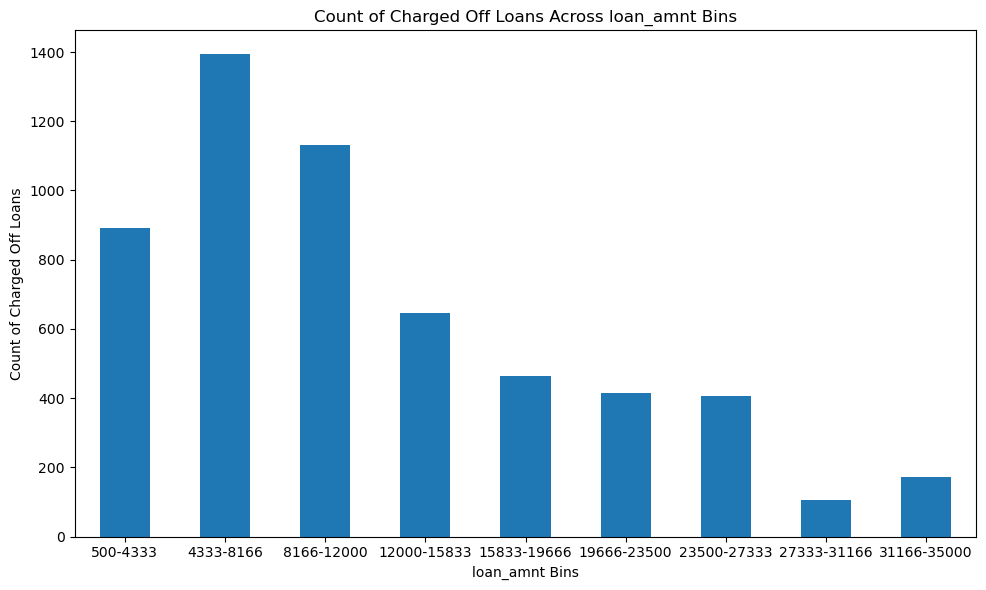

In [171]:
column = 'loan_amnt'

# Define bin edges
bin_edges = np.linspace(d2[column].min(), d2[column].max(), num=10) 

# Create bins and labels
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges) - 1)]

# Assign each value to a bin
d2[f'{column}_bins'] = pd.cut(d2[column], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Create cross-tabulation
cross_tab = pd.crosstab(d2[f'{column}_bins'], d2['loan_status'])
charged_off_counts = cross_tab['Charged Off']

# Plot the bar chart
charged_off_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Count of Charged Off Loans Across {column} Bins')
plt.xlabel(f'{column} Bins')
plt.ylabel('Count of Charged Off Loans')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()